$$ y_{t_j} = \phi^{t_j-t_{j-1}} \, y_{t_{j-1}} + \sigma \sqrt{ 1- \phi^{2 (t_{j}-t_{j-1})}} \, \epsilon_{t_j}$$

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import statsmodels.api as sm

In [2]:
# Generate few points
times = np.random.uniform(low=0, high=100, size=100)
times.sort()

sigma =1 
epsilon = np.random.normal(loc=0, scale=sigma, size=100)

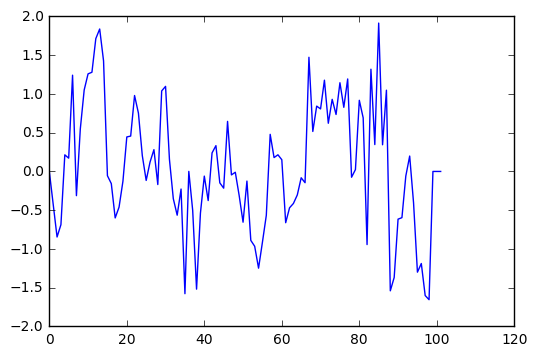

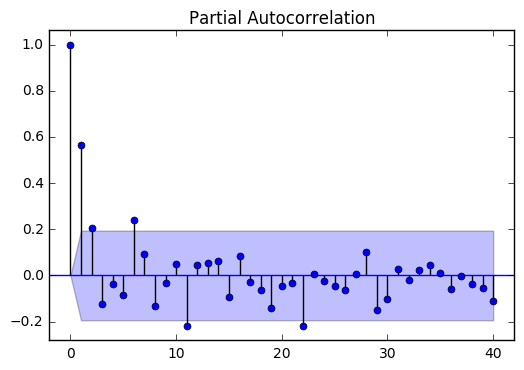

In [6]:
phi =0.65

y= np.zeros((102,1))
i=1
for tm in times[:-2]:
    dt = times[i]-times[i-1]
    y[i] = phi**(dt)* y[i-1] + np.sqrt( 1.0-phi**(2*dt))*epsilon[i]
    i = i + 1
    
plt.plot(y)
sm.graphics.tsa.plot_pacf(y, lags=40);

# The likelihood

Think of simple regression 
$$ y_i = \beta x_i+ \sigma \epsilon_i $$

likelihood for one point

$$ L(y_i| \beta) = \frac{1}{\sqrt{2\pi \sigma^2}}  \exp{ \left\{ -\frac{(\hat{y}_i - y_i)^2 }{ (2\sigma^2)} \right\}}$$ 

The $\beta$ dependency comes from $\hat{y}$. Obviously for all data we have 
$$ L(Y|\beta) = \prod_i L(y_i| \beta)$$


--- 
$$ y_{t_j} = \phi^{t_j-t_{j-1}} \, y_{t_{j-1}} + \sigma \sqrt{ 1- \phi^{2 (t_{j}-t_{j-1})}} \, \epsilon_{t_j}$$

define:

$$ d_j = (t_{j}-t_{j-1}) $$
$$\nu_j= \sigma \sqrt{ 1- \phi^{2 d_j}} $$
$$ e_j = \hat{y}_{t_j} - y_{t_j}$$
$$ \hat{y}_{t_j} = \phi^{d_j} \, y_{t_{j-1}} $$

$\newcommand{\nuj}[]{\sigma \sqrt{ 1- \phi^{2 d_j}}}$

Now to autoregressive models. The predictor in our case is $y_{t_{j-1}}$, so for one measurement we have: 


$$ L(y_{t_j}| \phi) = \frac{1}{\sqrt{2\pi \nu_j^2}}  \exp{ \left\{ -\frac{e_j^2 }{ 2\nu_j^2} \right\}}$$ 

$$ L(Y|\phi) = \prod_j \frac{1}{\sqrt{2\pi \nu_j^2}}  \exp{ \left\{ -\frac{e_j^2 }{ 2\nu_j^2} \right\}}$$ 

log-likelihood 

$$  \log( L(Y|\phi) )   = \log \prod_j \frac{1}{\sqrt{2\pi \nu_j^2}}  \exp{ \left\{ -\frac{e_j^2 }{ 2\nu_j^2} \right\}}$$
$$  = \sum_j \log \frac{1}{\sqrt{2\pi \nu^2}}  \exp{ \left\{ -\frac{e_j^2 }{ 2\nu^2} \right\}}$$

$$  = \sum_j \log \frac{1}{\sqrt{2\pi \nu_j^2}} + \sum_j \log \exp{ \left\{ -\frac{e_j^2 }{ 2\nu_j^2} \right\}}$$

$$  = -\frac{1}{2} \sum_j \log 2\pi \nu_j^2 + \sum_j \log \exp{ \left\{ -\frac{e_j^2 }{ \nu_j^2} \right\}}$$

$$ \propto - \sum_j \log \nu_j - \sum_j  \frac{e_j^2 }{ 2\nu_j^2}$$

or 
$$  l(Y|\phi) = -\log( L(Y|\phi) ) \propto \sum_j \log \nu_j  + \sum_j  \frac{e_j^2 }{ \nu_j^2}$$

$$ \boxed{ l(Y|\phi) \propto \sum_j \log \nu_j  + \sum_j  \frac{e_j^2 }{ \nu_j^2}}$$ 

Examine the derivatives: 
$$ \frac{d l(Y|\phi)}{d \phi} \propto \sum_j \frac{d \log\nu_j}{d \phi} + \sum_j \frac{d }{d\phi} \frac{e_j^2 }{ 2\nu_j^2} $$

$$ \frac{d \nu_j}{d \phi}  = \frac{d \, \sigma \sqrt{ 1- \phi^{2 d_j}}}{d \phi} $$
$$ \frac{d \nu_j}{d \phi}  = -\frac{\sigma}{2 \sqrt{ 1- \phi^{2 d_j}}} \frac{d \, \phi^{2 d_j}}{d \phi} $$

$$ \boxed{\frac{d \nu_j}{d \phi}  = -\frac{ \sigma \, d_j}{\sqrt{ 1- \phi^{2 d_j}}}  \phi^{2 d_j-1} }$$

$$ \boxed{\frac{d \nu_j^2}{d \phi}  =  -2\sigma^2 \, d_j  \,\phi^{2 d_j-1}} $$



---

$$ \frac{d \log \nu_j}{d \phi} = \frac{1}{\nu_j}\frac{d \nu_j}{d \phi}= -\frac{1}{ \sigma \sqrt{ 1- \phi^{2 d_j}}} \frac{ \, \sigma \, d_j}{\sqrt{ 1- \phi^{2 d_j}}}  \phi^{2 d_j-1}  =  -  \, d_j \frac{\phi^{2 d_j-1}}{ 1- \phi^{2 d_j}}   $$

$$ \boxed{\boxed{  \frac{d \log \nu_j}{d \phi} =  - \, d_j \, \frac{\phi^{2 d_j-1}}{ 1- \phi^{2 d_j}} }}  $$

---


$$ \boxed{ \boxed{\frac{d e_j^2}{d \phi} = 2 d_j \, \phi^{2d_j-1} \, y_{t_{j-1}}^2  - 2 \, d_j \, \phi^{d_j-1} y_{t_{j-1}} y_{t_{j}} }}$$




--- 
$$  \frac{d }{d \phi} \frac{e_j^2 }{ 2\nu_j^2}  = \frac{\nu_j^2  d e_j^2 / d \phi-  e_j^2  d \nu_j^2 / d \phi }{4 \nu_j^4}  = \frac{ 2 \nu_j^2 ( \, y_{t_{j-1}}^2 \phi -  y_{t_{j-1}} y_{t_{j}})-   e_j^2  2  \, d_j \, \frac{\phi^{2 d_j-1}}{ 1- \phi^{2 d_j}} }{4 \sigma^4 (1- \phi^{2 d_j})^2} $$
\\


$$\frac{d }{d \phi} \frac{e_j^2 }{ 2\nu_j^2}  = \frac{ 2 \nu_j^2 \, ( 1- \phi^{2 d_j} ) ( \, y_{t_{j-1}}^2 \phi -  y_{t_{j-1}} y_{t_{j}})-   e_j^2  2  \, d_j \, \phi^{2 d_j-1} }{4 \sigma^4 (1- \phi^{2 d_j})^2 ( 1- \phi^{2 d_j} )} $$

## Lets examine when d_j = 1 (regular time series) 
Sanity check. I should get $\phi$ to be something sensible

$$ \hat{y}_{t_j} = \phi^{d_j} \, y_{t_{j-1}} \rightarrow  \hat{y}_{j} =\phi \, y_{t_{j-1}}   $$
$$ \nu_j = \nu= \sigma \sqrt{1-\phi^2 }$$
$$ e_j = \phi \, y_{j-1} - y_j $$

$$ \boxed{ \sum_j \frac{ \log \nu_j}{d \phi} = 2\, \sum_j \frac{\phi}{1-\phi^2} = 2 \, n \,  \frac{\phi}{1-\phi^2} }$$

---- 

$$ \sum_j{ \frac{d }{d \phi} \frac{e_j^2 }{ 2\nu^2}}  = \sum_j{ \frac{ 2 \nu^2 \, \phi \, y_{j-1}-  \frac{4 \, e_j^2}{\sqrt{ 1- \phi^{2}}}  \phi }{\sigma^4 (1- \phi^{2})^2}}  =
 \sum_j{ \left\{ \frac{ 2 \sqrt{1-\phi^2} \phi^2 y_{j-1} - 4 \, \phi e_j^2}{\sigma^4 \sqrt{1-\phi^2} (1-\phi^2)^2} \right\}} \\
 =
  \frac{ 2 \sqrt{1-\phi^2} \phi^2  \sum_j  y_{j-1} - 4 \phi  \sum_j  e_j^2}{\sigma^4 \sqrt{1-\phi^2} (1-\phi^2)^2}
 $$

----

$$  \sum_j \frac{ \log \nu_j}{d \phi} + \sum_j  \frac{d }{d \phi} \frac{e_j^2 }{ 2\nu^2} =  2 \, n \,  \frac{\phi}{1-\phi^2}  + \frac{ 2 \sqrt{1-\phi^2} \phi^2  \sum_j  y_{j-1} - 4 \phi  \sum_j  e_j^2}{\sigma^4 \sqrt{1-\phi^2} (1-\phi^2)^2} \\
 = 2n\,\frac{\phi}{1-\phi^2}\left\{1 + \frac{  \sqrt{1-\phi^2} \phi  \frac{\sum_j y_{j-1}}{n} -2 \frac{1}{n}  \sum_j  e_j^2}{\sigma^4 \sqrt{(1-\phi^2)} (1-\phi^2)}  \right\} \\ 
 =\frac{\phi}{\sqrt{(1-\phi^2)} \, (1-\phi^2)^2}\left\{ \sigma^4\,\sqrt{(1-\phi^2)} \, (1-\phi^2) +   \bar{y} \sqrt{1-\phi^2} \phi   - 2 \sum_j{e_j^2}/n \right\}
 $$
 
 $$ \rightarrow \sigma^4\,\sqrt{(1-\phi^2)}\, (1-\phi^2) +   \bar{y}  \sqrt{1-\phi^2} \, \phi   - 2  \sum_j{e_j^2}/n =0 
 \\ \alpha \sqrt{(1-\phi^2)} \,(1-\phi^2) + \beta \sqrt{1-\phi^2} \, \phi  - \gamma = 0
 $$
 where 
 $$ \alpha =   \sigma^4 \\
 \beta = \bar{y} \\
 \gamma =  2 \frac{\sum_j  e_j^2}{n} $$

In [103]:
# Generate few points
#times = np.random.uniform(low=0, high=100, size=100)
#times.sort()

times = np.linspace(0, 100, num=101 )

sigma =1 
epsilon = np.random.normal(loc=0, scale=sigma, size=100)

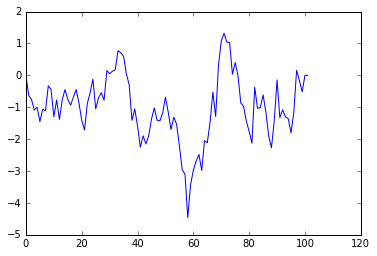

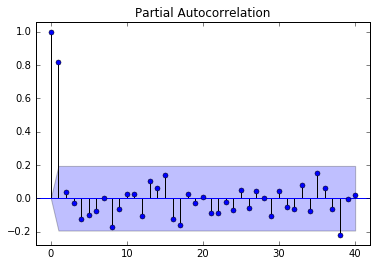

In [108]:
phi =.8

y= np.zeros((102,1))
e= np.zeros((102,1))
i=1
for tm in times[:-2]:
    dt = times[i]-times[i-1]
    y[i] = phi**(dt)* y[i-1] + np.sqrt( 1.0-phi**(2*dt))*epsilon[i]
    e[i]= y[i]-y[i-1]
    i = i + 1
    
plt.plot(y)
q=sm.graphics.tsa.plot_pacf(y, lags=40);
q = sm.tsa.pacf(y)

In [114]:
n = len(y)
print 'gamma=', 2*np.sum(e**2)/n, np.mean(y)

gamma= 0.707772214898 -0.99804152051


$\newcommand{\nuj}[1]{\vec{#1}}$
$\nuj[a]$

$\nuj[a]$